In [71]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 19.1 MB/s eta 0:00:00


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
import numpy as np
import pandas as pd
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [73]:
df = pd.read_csv("/content/yahoo_stock.csv", index_col='Date')

In [74]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 2015-11-23 to 2020-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1825 non-null   float64
 1   Low        1825 non-null   float64
 2   Open       1825 non-null   float64
 3   Close      1825 non-null   float64
 4   Volume     1825 non-null   float64
 5   Adj Close  1825 non-null   float64
dtypes: float64(6)
memory usage: 99.8+ KB


In [77]:
df.index = pd.to_datetime(df.index)

In [78]:
df.shape

(1825, 6)

In [79]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

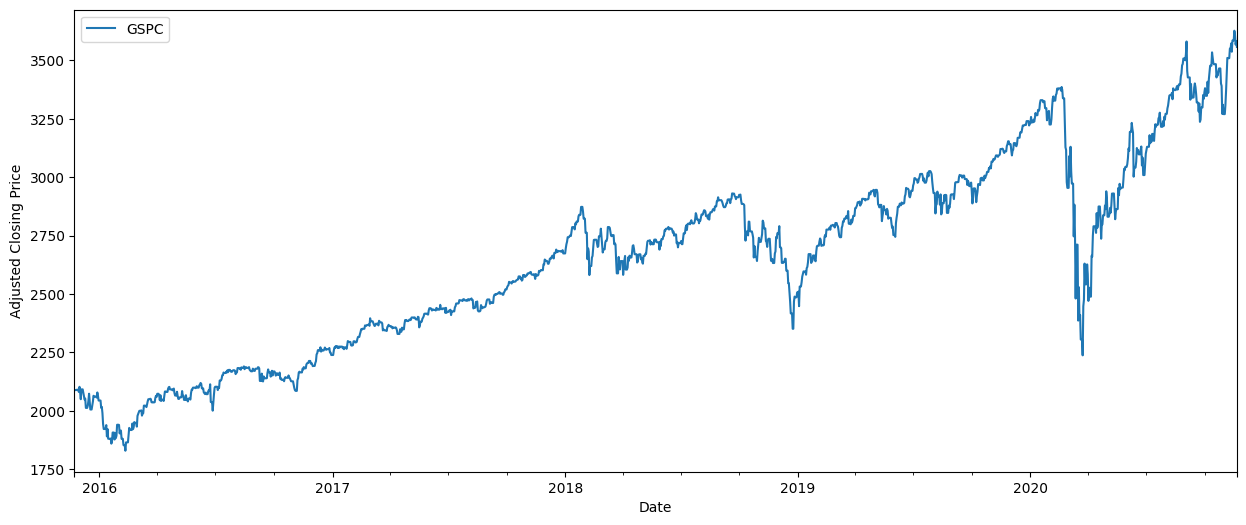

In [81]:
fig, ax = plt.subplots(figsize=(15, 6))
df['Adj Close'].plot(ax=ax, label='GSPC')

plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')

plt.legend();

In [82]:
df['return'] = df['Adj Close'].pct_change() * 100

In [85]:
def wrangle_data(df):
    df.sort_index(ascending=True, inplace=True)

    return df['return'].dropna()

In [86]:
data = wrangle_data(df)


In [87]:
data.head()

Date
2015-11-24    0.122200
2015-11-25   -0.012913
2015-11-26    0.000000
2015-11-27    0.059362
2015-11-28    0.000000
Name: return, dtype: float64

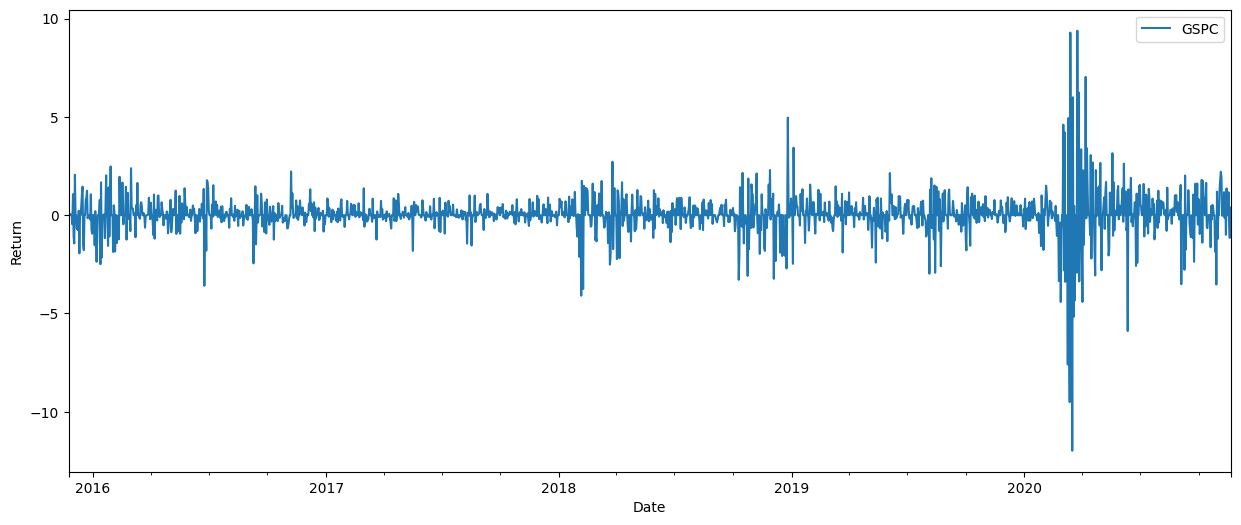

In [88]:
fig, ax = plt.subplots(figsize=(15, 6))

data.plot(ax=ax, label="GSPC")
plt.xlabel("Date")
plt.ylabel("Return")

plt.legend();

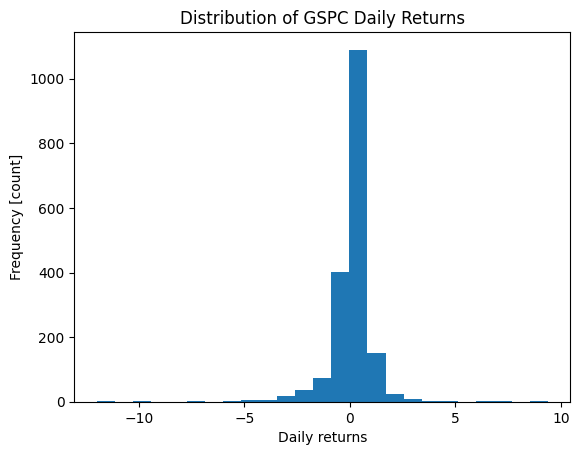

In [89]:
plt.hist(data, bins=25)

plt.xlabel('Daily returns')
plt.ylabel('Frequency [count]')


plt.title('Distribution of GSPC Daily Returns');

In [90]:
daily_volatility = data.std()
print(daily_volatility)

1.0119201538735036


In [91]:
annual_volatility = daily_volatility * np.sqrt(252)
print(annual_volatility)

16.063734442821026


In [92]:
rolling_50d_volatility = data.rolling(window=50).std().dropna()

print("rolling_50d_volatility type:", type(rolling_50d_volatility))
print("rolling_50d_volatility shape:", rolling_50d_volatility.shape)
rolling_50d_volatility.head()

rolling_50d_volatility type: <class 'pandas.core.series.Series'>
rolling_50d_volatility shape: (1775,)


Date
2016-01-12    0.893363
2016-01-13    0.952315
2016-01-14    0.987954
2016-01-15    1.027179
2016-01-16    1.026902
Name: return, dtype: float64

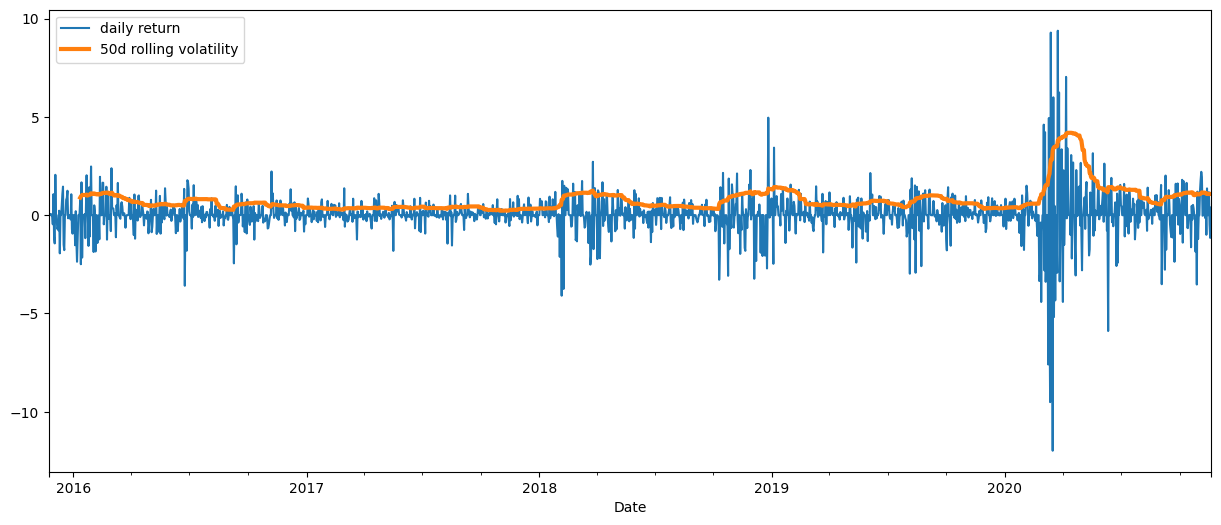

In [93]:
fig, ax = plt.subplots(figsize=(15, 6))

data.plot(ax=ax, label='daily return')
rolling_50d_volatility.plot(ax=ax, label='50d rolling volatility', linewidth=3)

plt.xlabel('Date')

plt.legend();

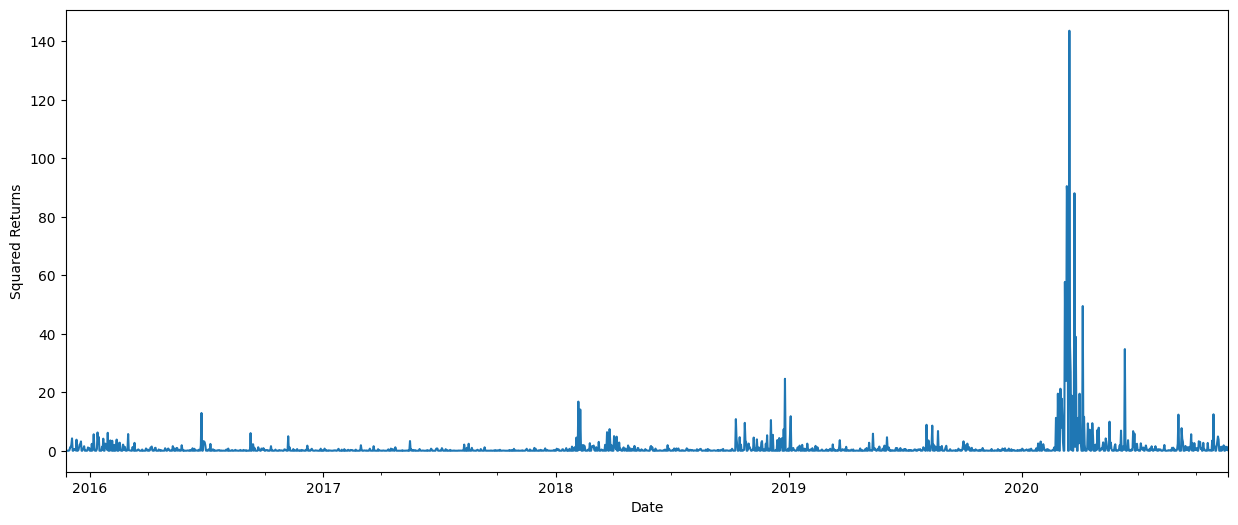

In [94]:
fig, ax = plt.subplots(figsize=(15, 6))

(data**2).plot(ax=ax)

plt.xlabel('Date')
plt.ylabel('Squared Returns');

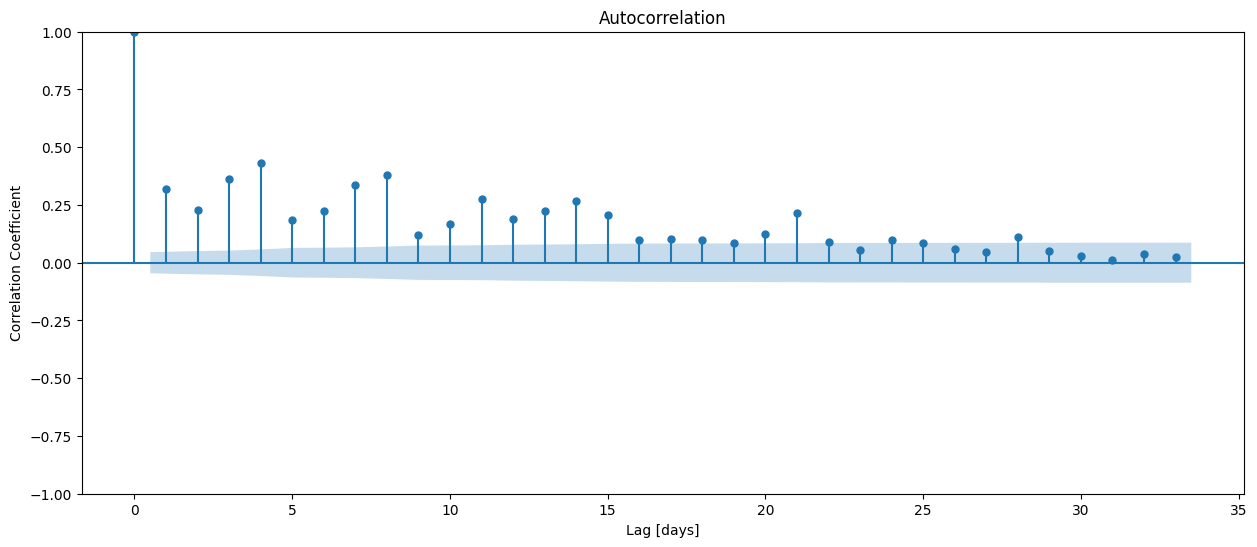

In [95]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(data**2, ax=ax)

plt.xlabel('Lag [days]')
plt.ylabel('Correlation Coefficient');

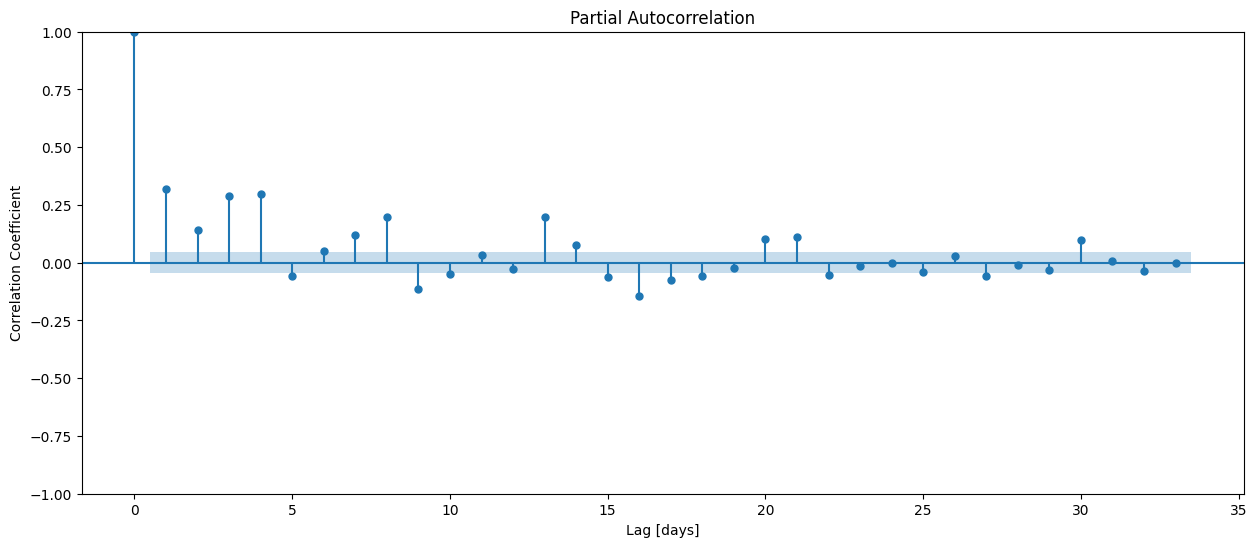

In [96]:
fig, ax = plt.subplots(figsize=(15, 6))

plot_pacf(data**2, ax=ax)

plt.xlabel('Lag [days]')
plt.ylabel('Correlation Coefficient');

In [97]:
cutoff_test = int(len(data) * 0.8)
data_train = data.iloc[:cutoff_test]

print("data_train type:", type(data_train))
print("data_train shape:", data_train.shape)
data_train.tail()

data_train type: <class 'pandas.core.series.Series'>
data_train shape: (1459,)


Date
2019-11-17    0.000000
2019-11-18    0.050315
2019-11-19   -0.059259
2019-11-20   -0.375618
2019-11-21   -0.158275
Name: return, dtype: float64

In [99]:
model = arch_model(
    data_train,
    p=1,
    q=1,
    rescale=False
).fit(disp=0)
print("model type:", type(model))

model.summary()

model type: <class 'arch.univariate.base.ARCHModelResult'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1314.49
Distribution:                  Normal   AIC:                           2636.98
Method:            Maximum Likelihood   BIC:                           2658.12
                                        No. Observations:                 1459
Date:                Tue, Jul 23 2024   Df Residuals:                     1458
Time:                        20:29:36   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0608  1.471e-02      4.133  3.575e-05 [3.196e-02,8.961e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0181  5.830e-03      3.105  1.903e-03 [6.675e-03,2.953e-02]
alpha[1]       0.1246  3.102e-02      4.016  5.907e-05   [6.379e-02,  0.185]
beta[1]        0.8408  2.650e-02     31.729 6.156e-221     [  0.789,  0.893]
============================================================================

Covariance estimator: robust
"""

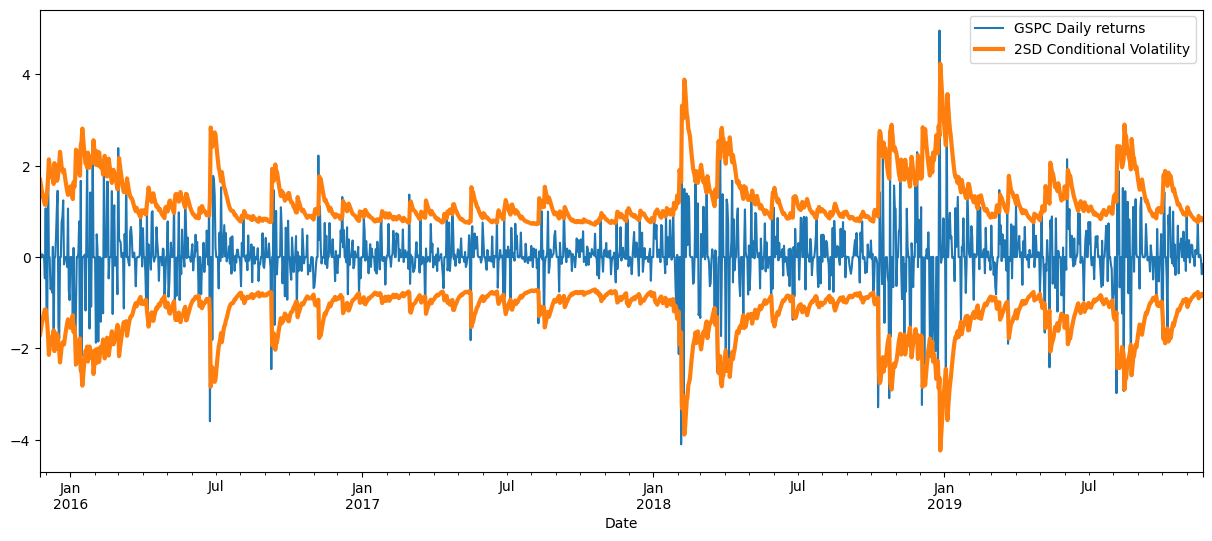

In [101]:
fig, ax = plt.subplots(figsize=(15, 6))

data_train.plot(ax=ax, label='GSPC Daily returns')

(2 * model.conditional_volatility).plot(
    ax=ax,
    color='C1',
    label='2SD Conditional Volatility',
    linewidth=3
)

(-2 * model.conditional_volatility).rename('').plot(
    ax=ax,
    color='C1',
    linewidth=3
)
plt.xlabel('Date')

plt.legend();

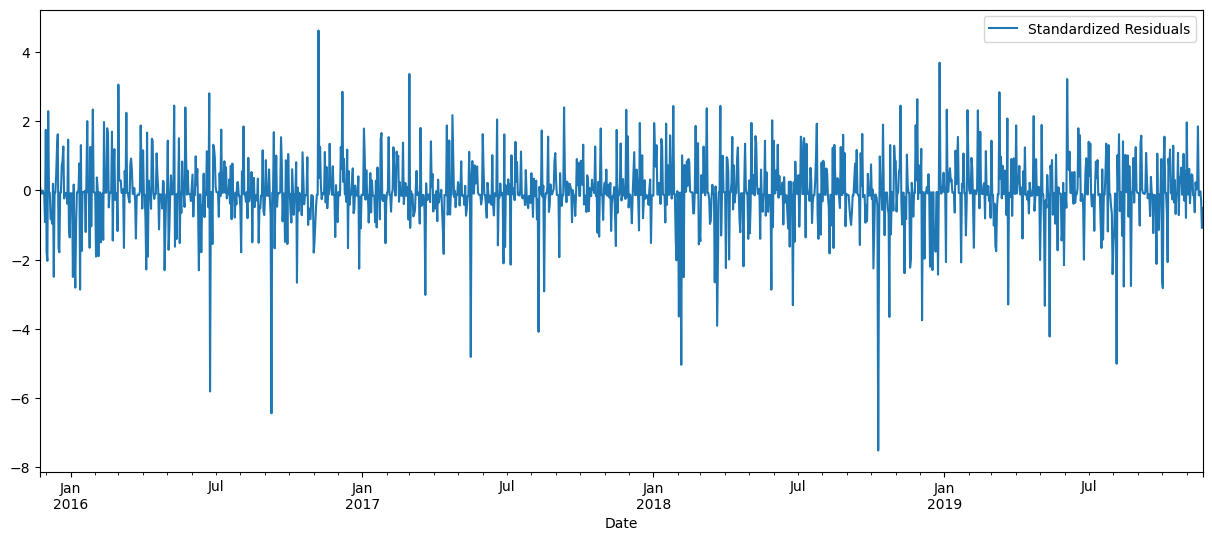

In [102]:
fig, ax = plt.subplots(figsize=(15, 6))
model.std_resid.plot(ax=ax, label='Standardized Residuals')
plt.xlabel('Date')
plt.legend();

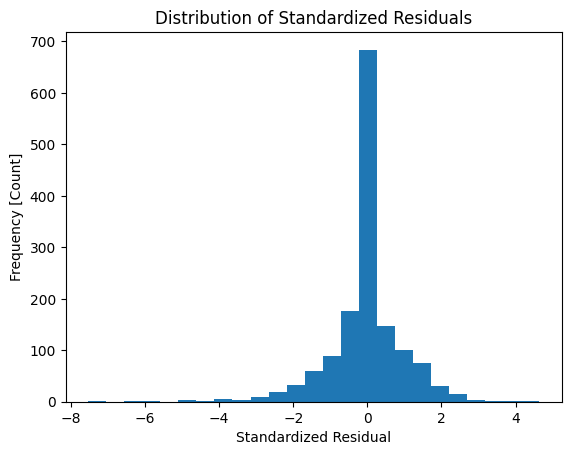

In [103]:
plt.hist(model.std_resid, bins=25)
plt.xlabel('Standardized Residual')
plt.ylabel('Frequency [Count]')
plt.title('Distribution of Standardized Residuals');

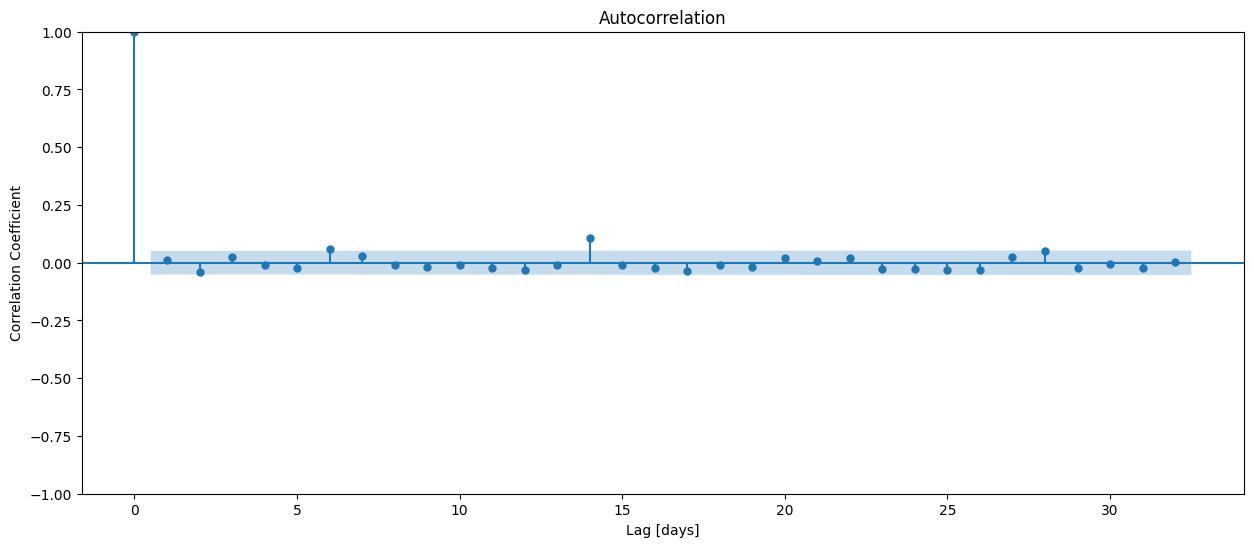

In [104]:
fig, ax = plt.subplots(figsize=(15, 6))

plot_acf(model.std_resid**2, ax=ax)

plt.xlabel('Lag [days]')
plt.ylabel('Correlation Coefficient');

In [105]:
data_train.tail(1)

Date
2019-11-21   -0.158275
Name: return, dtype: float64

In [106]:
one_day_forecast = model.forecast(horizon=1, reindex=False).variance

print("one_day_forecast type:", type(one_day_forecast))
one_day_forecast

one_day_forecast type: <class 'pandas.core.frame.DataFrame'>


,h.1
Date,
2019-11-21,0.172888


In [107]:
np.sqrt(one_day_forecast.iloc[0,0])

0.41579752936844305

In [108]:
predictions = []
test_size = int(len(data) * 0.2)
for i in range(test_size):
    data_train = data.iloc[: -(test_size - i)]

    model = arch_model(data_train, p=1, q=1, rescale=False).fit(disp=0)

    next_pred = model.forecast(horizon=1, reindex=False).variance.iloc[0,0] ** 0.5

    predictions.append(next_pred)

data_test_wfv = pd.Series(predictions, index=data.tail(test_size).index)

print("data_test_wfv type:", type(data_test_wfv))
print("data_test_wfv shape:", data_test_wfv.shape)
data_test_wfv.head()

data_test_wfv type: <class 'pandas.core.series.Series'>
data_test_wfv shape: (364,)


Date
2019-11-23    0.407768
2019-11-24    0.397530
2019-11-25    0.388616
2019-11-26    0.452544
2019-11-27    0.439413
dtype: float64

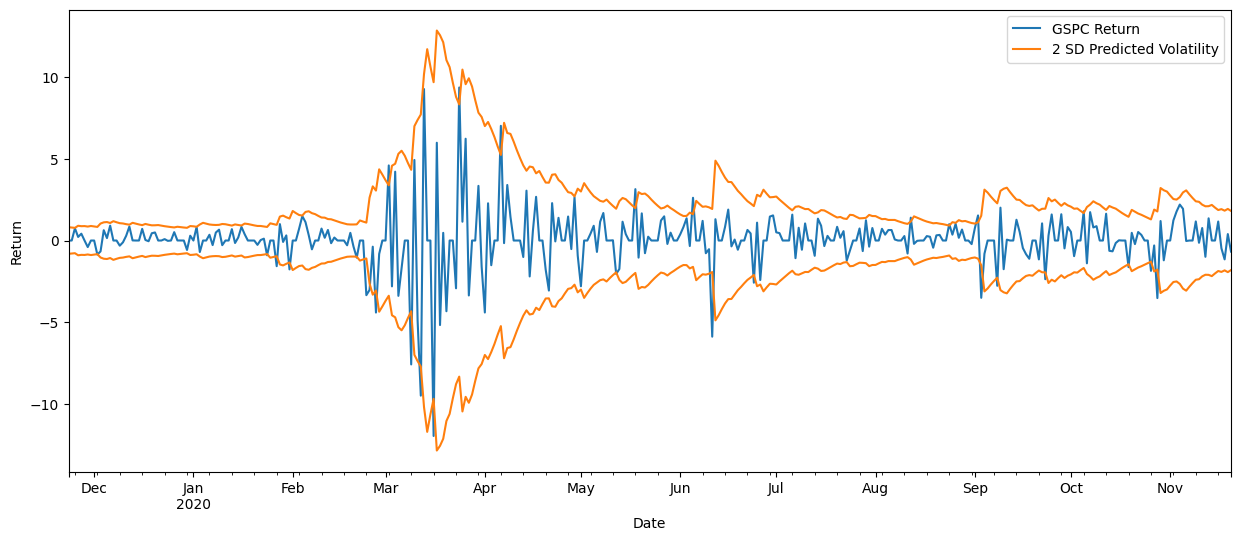

In [109]:
fig, ax = plt.subplots(figsize=(15, 6))

data.tail(test_size).plot(ax=ax, label="GSPC Return")

(2 * data_test_wfv).plot(ax=ax, c="C1", label="2 SD Predicted Volatility")

(-2 * data_test_wfv).plot(ax=ax, c="C1")

plt.xlabel("Date")
plt.ylabel("Return")

plt.legend();

In [110]:
prediction = model.forecast(horizon=5, reindex=False).variance ** 0.5
print(prediction)

start = (prediction.index[0]) + (pd.DateOffset(days=1))

prediction_dates = pd.bdate_range(start=start, periods=prediction.shape[1])

prediction_index = [d.isoformat() for d in prediction_dates]

print("prediction_index type:", type(prediction_index))
print("prediction_index len:", len(prediction_index))
prediction_index[:3]

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2020-11-19  0.906234  0.909022  0.911761  0.914452  0.917097
prediction_index type: <class 'list'>
prediction_index len: 5


['2020-11-20T00:00:00', '2020-11-23T00:00:00', '2020-11-24T00:00:00']

In [111]:
def clean_prediction(prediction):
    start = prediction.index[0] + pd.DateOffset(days=1)

    prediction_dates = pd.bdate_range(start=start, periods=prediction.shape[1])

    prediction_index = [d.isoformat() for d in prediction_dates]

    data = prediction.values.flatten() ** 0.5

    prediction_formatted = pd.Series(data, index=prediction_index)

    return prediction_formatted.to_dict()

In [112]:
prediction = model.forecast(horizon=10, reindex=False).variance
prediction_formatted = clean_prediction(prediction)
assert isinstance(prediction_formatted, dict)
assert all(isinstance(k, str) for k in prediction_formatted.keys())
assert all(isinstance(v, float) for v in prediction_formatted.values())

prediction_formatted

{'2020-11-20T00:00:00': 0.9062336894220886,
 '2020-11-23T00:00:00': 0.9090215738501944,
 '2020-11-24T00:00:00': 0.9117607406510729,
 '2020-11-25T00:00:00': 0.9144522080446614,
 '2020-11-26T00:00:00': 0.9170969663659221,
 '2020-11-27T00:00:00': 0.9196959791023729,
 '2020-11-30T00:00:00': 0.9222501838811016,
 '2020-12-01T00:00:00': 0.9247604934082967,
 '2020-12-02T00:00:00': 0.9272277963641179,
 '2020-12-03T00:00:00': 0.9296529582555261}